## Feature Selection-Information gain - mutual information In Classification Problem Statements

## Mutual Information

MI estimate mutual information for discrete target variable

Mutual Information (MI) betweem two random is a non-negative value, whcih measures dependency between the variable. It will be equal to zero if and only if two variable are independent, and higher value means higher dependency

The function relies on non parametric method based on entropy  estimation from K-Nearest neighbors distance.

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

## !(X; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [7]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
## Train test split to avoid overfiting
X=df.drop(columns=['Wine'],axis=1)
y=df['Wine']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.feature_selection import mutual_info_classif
## Determine mutual information
mutual_info=mutual_info_classif(X_train,y_train)

In [14]:
mutual_info

array([0.43076538, 0.2990207 , 0.17049864, 0.24642947, 0.20031009,
       0.47725955, 0.71173359, 0.1257527 , 0.25927519, 0.61346271,
       0.53335995, 0.55326573, 0.53758779])

In [19]:
mutual_info=pd.Series(mutual_info)
mutual_info
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.711734
Color.int               0.613463
OD                      0.553266
Proline                 0.537588
Hue                     0.533360
Phenols                 0.477260
Alcohol                 0.430765
Malic.acid              0.299021
Proanth                 0.259275
Acl                     0.246429
Mg                      0.200310
Ash                     0.170499
Nonflavanoid.phenols    0.125753
dtype: float64

In [22]:
import matplotlib.pyplot as plt

<AxesSubplot:>

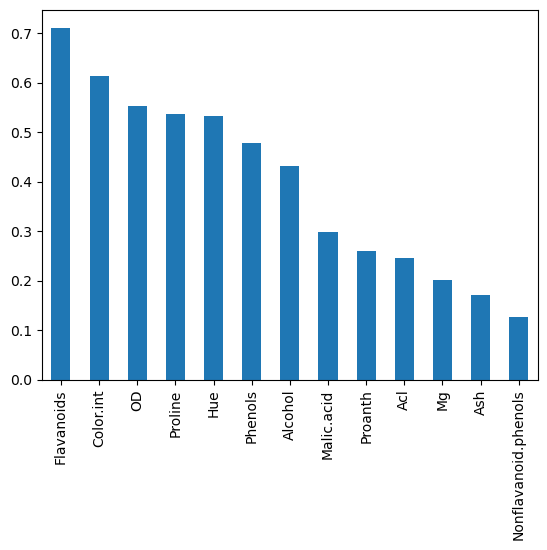

In [29]:
mutual_info.sort_values(ascending=False).plot.bar()

In [30]:
from sklearn.feature_selection import SelectKBest

In [32]:
## Now we will select top five important feature
sel_five_columns=SelectKBest(mutual_info_classif,k=5)
sel_five_columns.fit(X_train,y_train)
X_train.columns[sel_five_columns.get_support()]


Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

## Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

As F-test captures only linear dependency, it rates x_1 as the most discriminative feature. On the other hand, mutual information can capture any kind of dependency between variables and it rates x_2 as the most discriminative feature, which probably agrees better with our intuitive perception for this example. 